In [0]:
#import packages
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
#import dataset
(X_Train, y_Train), (X_test, y_test) = cifar10.load_data()
from sklearn.model_selection import train_test_split as tts
X_train, X_cv, y_train, y_cv = tts(X_Train, y_Train, test_size=0.3, random_state=42)

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
print(X_test.shape)
print(X_train.shape)
print(X_cv.shape)

(10000, 32, 32, 3)
(35000, 32, 32, 3)
(15000, 32, 32, 3)


In [0]:
#change shape from image to vector
X_train = X_train.reshape(35000, 32 * 32 * 3)
X_cv = X_cv.reshape(15000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

#preprocess
X_train = X_train.astype('float32')
X_cv = X_cv.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_cv /= 255.0
X_test /= 255.0

#change labels from numeric to one hot encoded
Y_train = to_categorical(y_train, 10)
Y_cv = to_categorical(y_cv, 10)
Y_test =  to_categorical(y_test, 10)

In [0]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adamax',
                  metrics=['accuracy'])

# training
history = model.fit(X_train, Y_train,
                        batch_size=32,
                        nb_epoch=20,
                        verbose=1,
                        validation_data=(X_cv, Y_cv))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.




Train on 35000 samples, validate on 15000 samples
Epoch 1/20





35000/35000 [==============================] - 88s 3ms/step - loss: 1.9094 - acc: 0.3134 - val_loss: 1.7269 - val_acc: 0.3820
Epoch 2/20
35000/35000 [==============================] - 88s 3ms/step - loss: 1.6990 - acc: 0.3879 - val_loss: 1.6404 - val_acc: 0.4110
Epoch 3/20
35000/35000 [==============================] - 85s 2ms/step - loss: 1.6141 - acc: 0.4219 - val_loss: 1.6255 - val_acc: 0.4118
Epoch 4/20
35000/35000 [==============================] - 87s 2ms/step - loss: 1.5405 - acc: 0.4492 - val_loss: 1.5622 - val_acc: 0.4426
Epoch 5/20
35000/35000 [==============================] - 90s 3ms/step - loss: 1.4870 - acc: 0.4682 - val_loss: 1.5266 - val_acc: 0.4549
Epoch 6/20
35000/35000 [==============================] - 85s 2ms/step - loss: 1.4425 - acc: 0.4825 - val_loss: 1.4879 - val_acc: 0.4728
Epoch 7/20
35000/35000 [==============================] - 83s 2ms/step - loss: 1.3973 - acc: 0.5006 - val_loss: 1.4580 - 

Hyperparameters:


*   Loss: categorical_crossentropy
*   Layers: 4
*   Activation : 3 'relu' layers 1 'softmax'
*   Optimizer: adamax





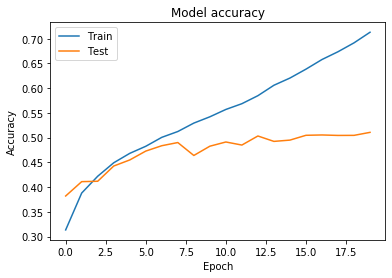

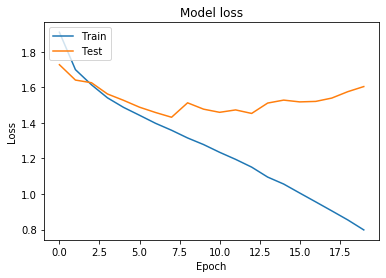

In [0]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

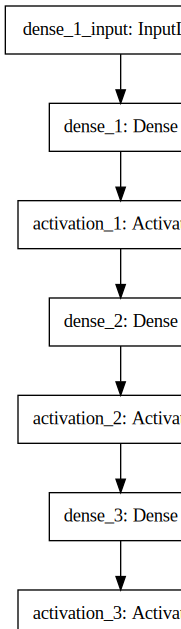

In [0]:
# Output network visualization
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
SVG(model_to_dot(model).create(prog='dot', format='svg'))